# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000, seed=0)

17465344/17464789 [==============================] - 15s 1us/step


In [3]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total para

In [7]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 16s 631us/step - loss: 0.4538 - acc: 0.7663 - val_loss: 0.3452 - val_acc: 0.8522
Epoch 2/5
25000/25000 [==============================] - 15s 601us/step - loss: 0.2954 - acc: 0.8757 - val_loss: 0.3287 - val_acc: 0.8547
Epoch 3/5
25000/25000 [==============================] - 16s 623us/step - loss: 0.2493 - acc: 0.8990 - val_loss: 0.3254 - val_acc: 0.8564
Epoch 4/5
25000/25000 [==============================] - 15s 614us/step - loss: 0.2179 - acc: 0.9142 - val_loss: 0.3555 - val_acc: 0.8507
Epoch 5/5
25000/25000 [==============================] - 15s 600us/step - loss: 0.1833 - acc: 0.9298 - val_loss: 0.3684 - val_acc: 0.8464


In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 3s 100us/step

 Test Accuracy: 0.8464


In [10]:
import numpy as np

# 데이터 

y_loss = history.history['loss']        # 훈련 손실값
y_vloss = history.history['val_loss']   # 검증 손실값

y_acc = history.history['acc']          # 훈련 정확도 
y_vacc = history.history['val_acc']     # 검증 정확도

x_len = np.arange(1, len(y_loss)+1)     # x축 데이터

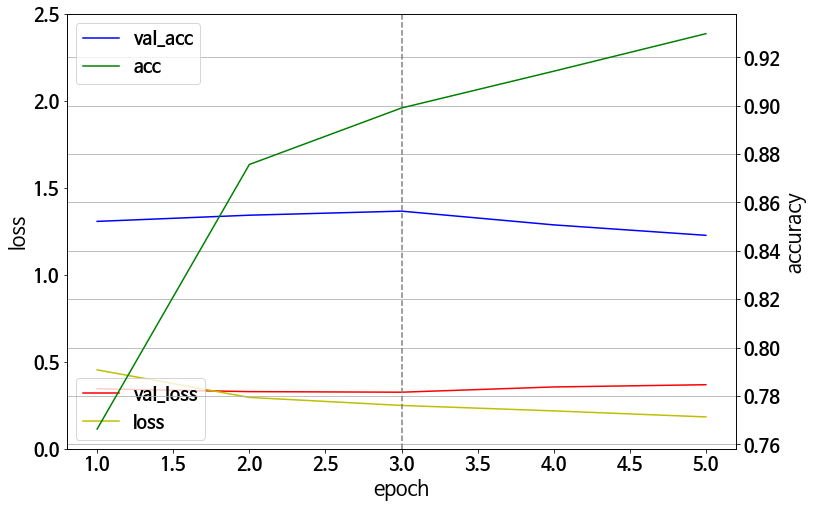

In [12]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(12, 8))

ax1, ax2= plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 
ax1.plot(x_len, y_vloss, color='red', label='val_loss')
ax1.plot(x_len, y_loss, color='y', label='loss')
ax2.plot(x_len, y_vacc, color='b', label='val_acc')
ax2.plot(x_len, y_acc, color='g', label='acc')

ax1.set_ylim((0, 2.5))
ax1.set_xlabel('epoch', size=20)  # 라벨 설정 
ax1.set_ylabel('loss', size=20)
ax2.set_ylabel('accuracy', size=20)

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.axvline(x=3, color='grey', linestyle='--')
plt.grid()
plt.show()